In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt

In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.1 MB/s eta 0:00:00


# **8:2**

In [3]:
df = pd.read_csv("Eth.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1915,3840.256348
1916,3763.196533
1917,3746.849609
1918,3760.026611


In [4]:
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1536
Test data size: 384


In [5]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18048.169, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18049.970, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18044.551, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18044.799, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18048.212, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=18046.321, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18046.429, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18047.073, Time=1.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=18042.828, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=18044.592, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=18044.701, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18043.076, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=18045.315, Time=0.56 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.393 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [7]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 881.308776764979
Testing MAE: 604.3256076478957
Testing MAPE: 20.887387250629775


Close price of ETH for the next 30 days:
[1800.19723792 1800.21827187 1800.21681526 1800.21691613 1800.21690915
 1800.21690963 1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096 ]


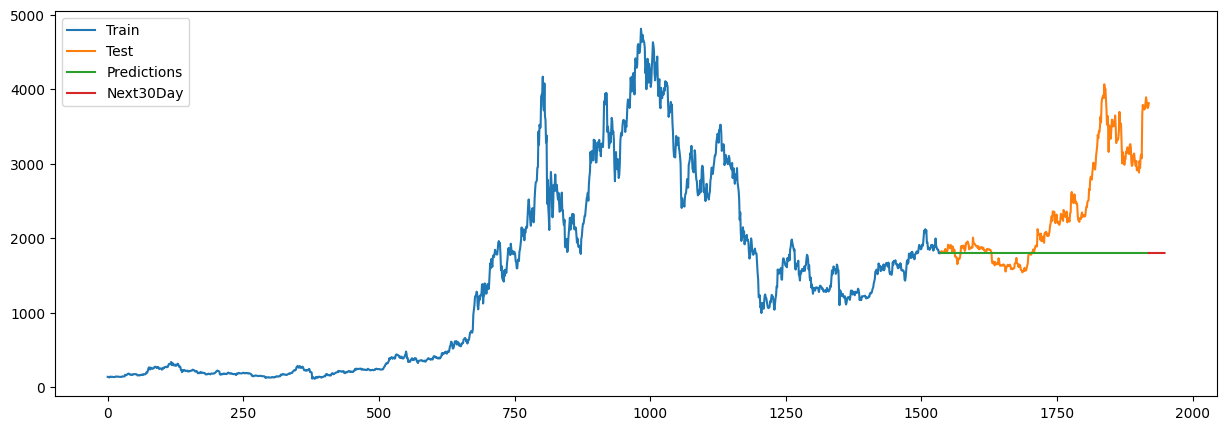

In [8]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Close price of ETH for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

Close price of ETH for the next 60 days:
[1800.19723792 1800.21827187 1800.21681526 1800.21691613 1800.21690915
 1800.21690963 1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096 ]


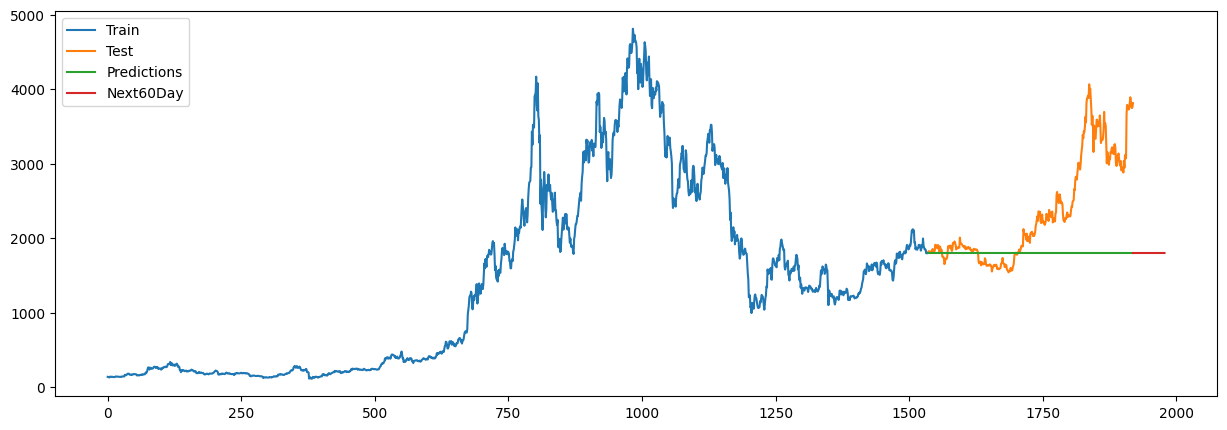

In [9]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Close price of ETH for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

Close price of ETH for the next 90 days:
[1800.19723792 1800.21827187 1800.21681526 1800.21691613 1800.21690915
 1800.21690963 1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.2169096  1800.2169096
 1800.2169096  1800.2169096  1800.2169096  1800.

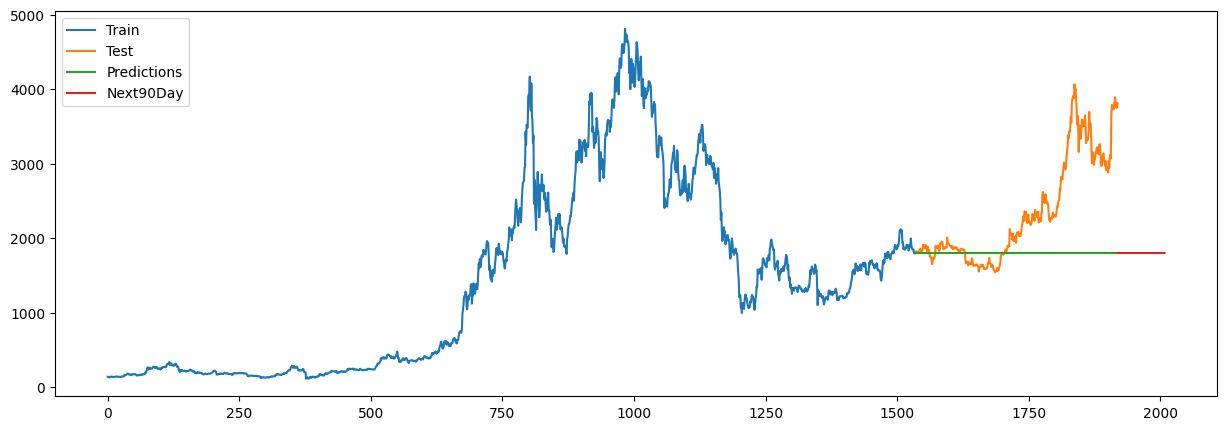

In [10]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Close price of ETH for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next90Day'])
plt.show()

# **7:3**

In [15]:
df = pd.read_csv("Eth.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1915,3840.256348
1916,3763.196533
1917,3746.849609
1918,3760.026611


In [16]:
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1344
Test data size: 576


In [17]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15908.521, Time=2.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15909.713, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15904.953, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15905.222, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15907.891, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15906.637, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15906.784, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15907.289, Time=1.25 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15903.158, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=15904.835, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15904.983, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15903.426, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=15905.465, Time=0.36 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.616 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [19]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 885.2155702801017
Testing MAE: 616.5900924314112
Testing MAPE: 24.697614575933702


Close price of ETH for the next 30 days:
[1530.70545821 1530.76457768 1530.76039837 1530.76069382 1530.76067293
 1530.76067441 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431]


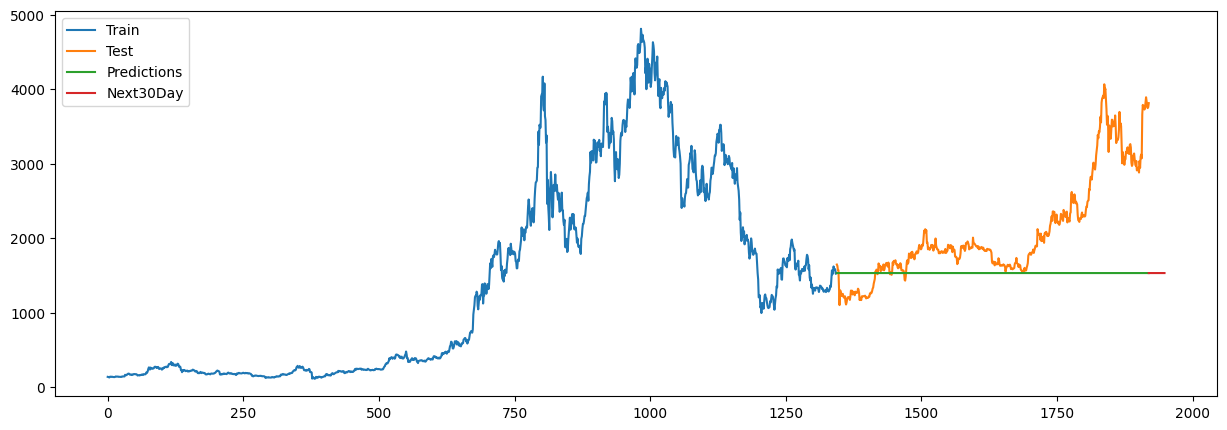

In [20]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Close price of ETH for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

Close price of ETH for the next 60 days:
[1530.70545821 1530.76457768 1530.76039837 1530.76069382 1530.76067293
 1530.76067441 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431]


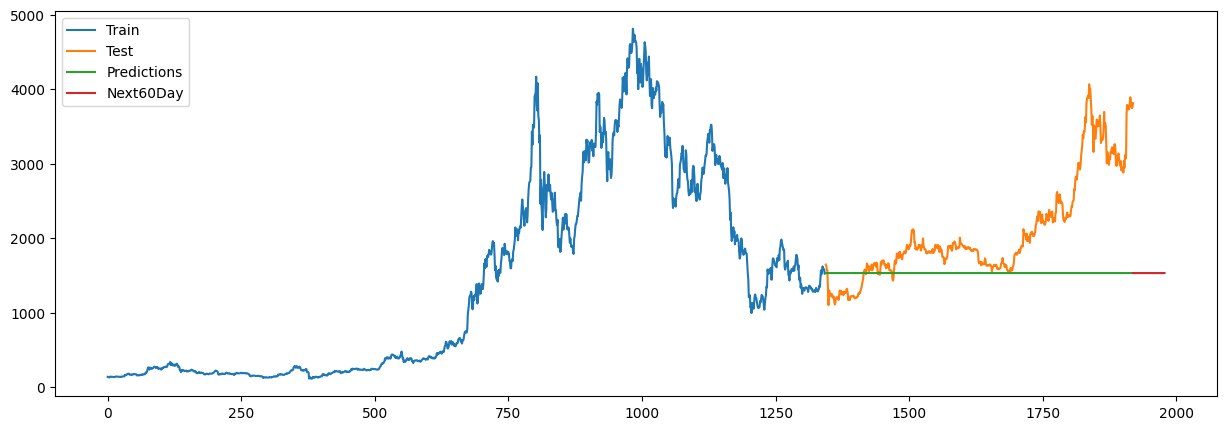

In [21]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Close price of ETH for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

Close price of ETH for the next 90 days:
[1530.70545821 1530.76457768 1530.76039837 1530.76069382 1530.76067293
 1530.76067441 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76067431 1530.76067431 1530.76067431
 1530.76067431 1530.76067431 1530.76

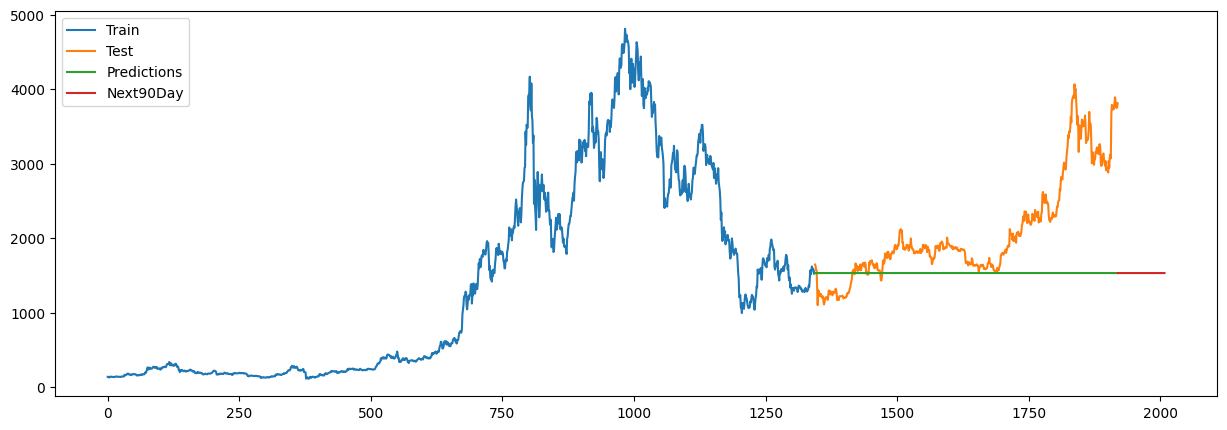

In [22]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Close price of ETH for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

# **6:4**

In [23]:
df = pd.read_csv("Eth.csv")
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df

,Close
0,136.443619
1,134.206955
2,132.249420
3,127.774124
4,137.822388
...,...
1915,3840.256348
1916,3763.196533
1917,3746.849609
1918,3760.026611


In [24]:
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

# Chia dữ liệu thành các tập
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1152
Test data size: 768


In [25]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13675.103, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13671.124, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13671.191, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13673.954, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13673.125, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13673.130, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13675.128, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13670.101, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=13672.101, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13672.107, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13670.170, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13674.102, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.672 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [26]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [27]:
# Đánh giá độ chính xác
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Testing RMSE: 1237.5262499242249
Testing MAE: 1141.927782605752
Testing MAPE: 71.1197438197671


Close price of ETH for the next 30 days:
[3003.22195467 3003.66146836 3003.63016817 3003.63239723 3003.63223848
 3003.63224979 3003.63224898 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904]


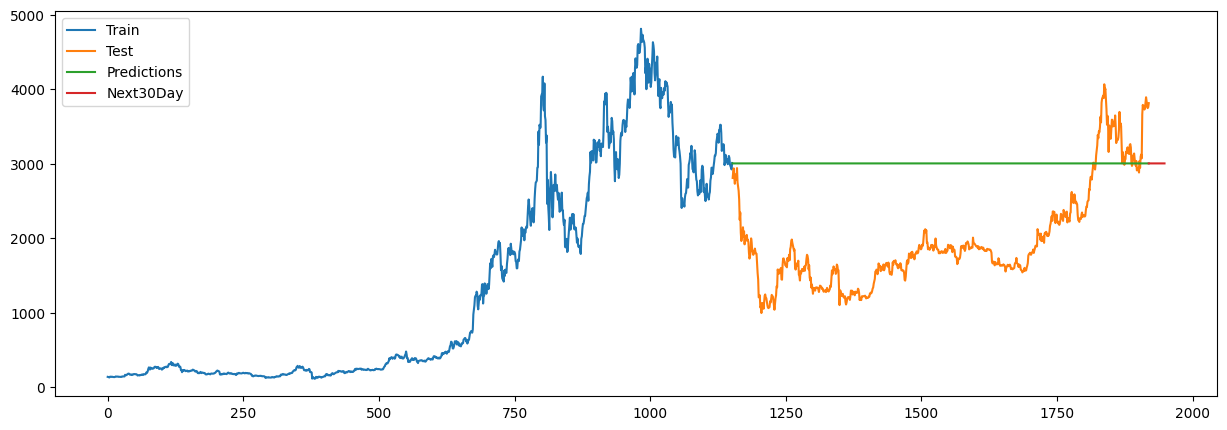

In [28]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Close price of ETH for the next 30 days:')
print(y_next_30_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

Close price of ETH for the next 60 days:
[3003.22195467 3003.66146836 3003.63016817 3003.63239723 3003.63223848
 3003.63224979 3003.63224898 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904]


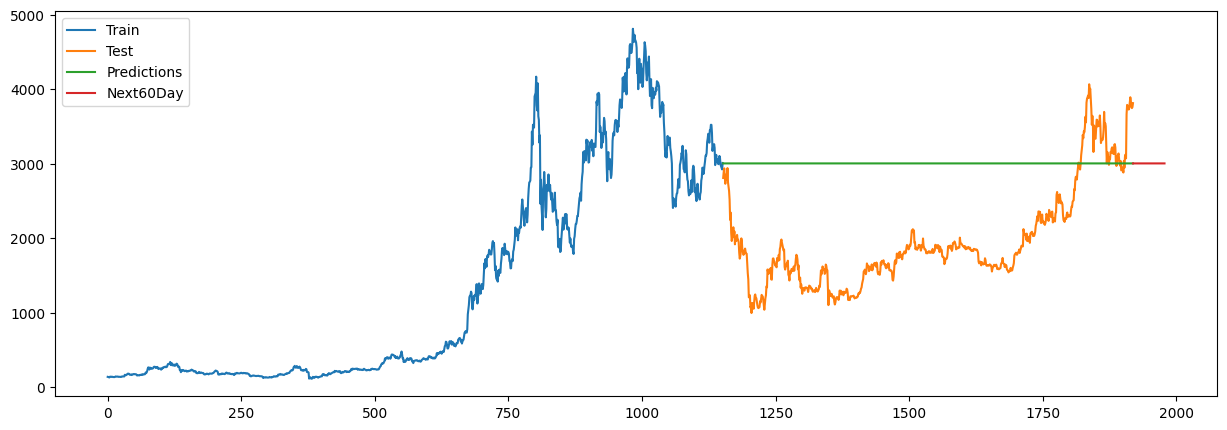

In [29]:
# Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Close price of ETH for the next 60 days:')
print(y_next_60_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

Close price of ETH for the next 90 days:
[3003.22195467 3003.66146836 3003.63016817 3003.63239723 3003.63223848
 3003.63224979 3003.63224898 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63224904 3003.63224904 3003.63224904
 3003.63224904 3003.63224904 3003.63

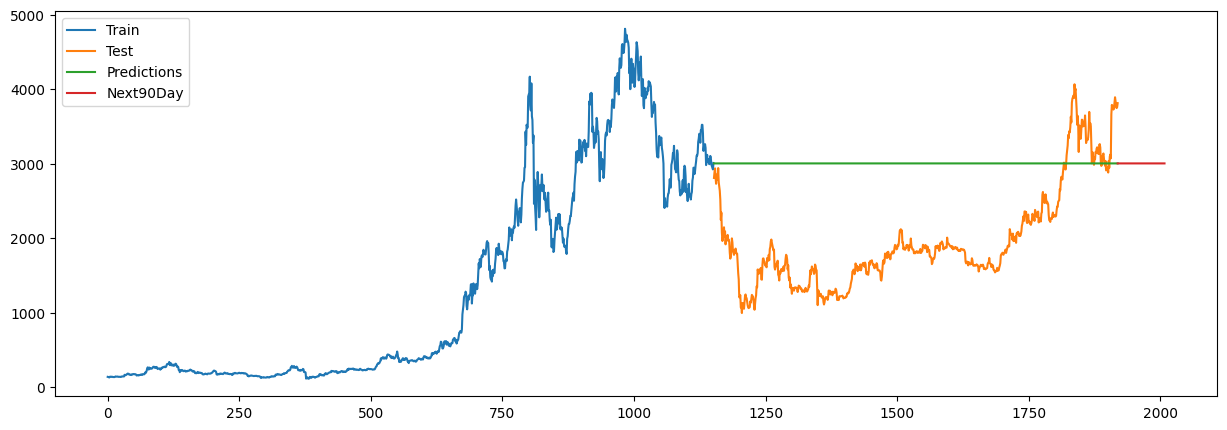

In [30]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Close price of ETH for the next 90 days:')
print(y_next_90_days)

plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()